# Import 

In [217]:
import pandas as pd
import numpy as np
import seaborn as sns
from datetime import datetime
from math import *
from datetime import datetime as date
import matplotlib.pyplot as plt



from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss
from math import sqrt

# DataFrame

In [219]:
txtdata = pd.read_table(".txt") # --> Enter the .txt flie here

# Data cleaning

## Separate the txt file in different columns

In [220]:
column_name = txtdata.columns[0]

In [221]:
txtdata["Date"] = txtdata[column_name].str.split(" ").str.get(0).str.title()

txtdata["Hour"] = txtdata[column_name].str.split(" ").str.get(1).str.title()

txtdata["Name"] = txtdata[column_name].str.split(" ").str.get(2).str.title()

txtdata["Content"] = txtdata[column_name].str.split(":").str.get(3)


In [222]:
columns_save = ['Date', 'Hour', 'Name', 'Content']
df = txtdata[columns_save]

In [223]:
# Delet "[" brakets "]" and ":" 

df["Date"] = df["Date"].str.split("[").str.get(1)

df["Hour"] = df["Hour"].str.split("]").str.get(0)

df["Name"] = df["Name"].str.split(":").str.get(0)

C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/818377401.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date"] = df["Date"].str.split("[").str.get(1)
C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/818377401.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hour"] = df["Hour"].str.split("]").str.get(0)
C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/818377401.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_index

In [226]:
df[-1:]

,Date,Hour,Name,Content
11099,27/10/21,18:50:26,Berta,‎Videotrucada perduda


## Delet the Nan values

In [227]:
# Show all the columns that contain Nan

df[df["Date"].isna()]

,Date,Hour,Name,Content
2125,NaN,NaN,NaN,NaN
2444,NaN,Es,Un,NaN
2737,NaN,NaN,NaN,NaN
4543,NaN,NaN,NaN,NaN
5171,NaN,Decirte,Todo,NaN
5172,NaN,"Sé,",Estoy,NaN
5173,NaN,"Nada,",Que,NaN
5398,NaN,NaN,NaN,NaN
6709,NaN,NaN,NaN,NaN
8809,NaN,Https://Ubereats.App.Link/Kgfp9R8Tnfb,NaN,NaN


In [228]:
# Save the df without any nan values

df = df[~df["Date"].isna()]

## Creat new columns

### Len

In [229]:
df["Len"] = df["Content"].str.len()
df["Len"] = df["Len"] -1

C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/3523385574.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Len"] = df["Content"].str.len()
C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/3523385574.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Len"] = df["Len"] -1


### Date and hour

In [230]:
df["Date - Hour"] = df["Date"] + " " + df["Hour"]

C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/1102387372.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date - Hour"] = df["Date"] + " " + df["Hour"]


In [231]:
df["Date - Hour"] = df["Date - Hour"] .astype('datetime64')

C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/1387065450.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Date - Hour"] = df["Date - Hour"] .astype('datetime64')


In [232]:
df["Hour"] = df["Hour"].astype("datetime64")

C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/3758277598.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hour"] = df["Hour"].astype("datetime64")


### Day of the week

In [233]:
# Day of the week

df["Day_of_week"] = df["Date - Hour"].dt.dayofweek

C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/1493547503.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Day_of_week"] = df["Date - Hour"].dt.dayofweek


In [234]:
def day_of_week (day):
    if day == 0:
        return "Monday"
    if day == 1:
        return "Tuesday"
    if day == 2:
        return "Wednesday"
    if day == 3:
        return "Thursday"
    if day == 4:
        return "Friday"
    if day == 5:
        return "Saturday"
    else:
        return "Sunday"

df["Day_of_week"] = df["Day_of_week"].apply(day_of_week)

C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/2412434192.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Day_of_week"] = df["Day_of_week"].apply(day_of_week)


### Schedule

In [235]:
df["H"] = df["Date - Hour"].dt.hour

C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/3749304880.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["H"] = df["Date - Hour"].dt.hour


In [236]:
now = datetime.now()
time = df["Date - Hour"].dt.strftime("%H:%M:%S")
time = time.astype('datetime64')
df["Hora"] = time

C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/2158592753.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Hora"] = time


In [237]:
def between (h):
        
    
    if (h == 22) or  (23 == h) or (h == 0) or (h == 1) or  (2 == h) or (h == 3) or (23 == 4) or (23 == 5):
        return "Night"
    
    if (h >= 10) and  (h < 19):
        return "Work"
    
    else: 
        return "No Work"

df["Schedule"] = df["H"].apply(between)

C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/856702072.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Schedule"] = df["H"].apply(between)


# Data Visualization

## Hours with more messages

<AxesSubplot:xlabel='H', ylabel='count'>

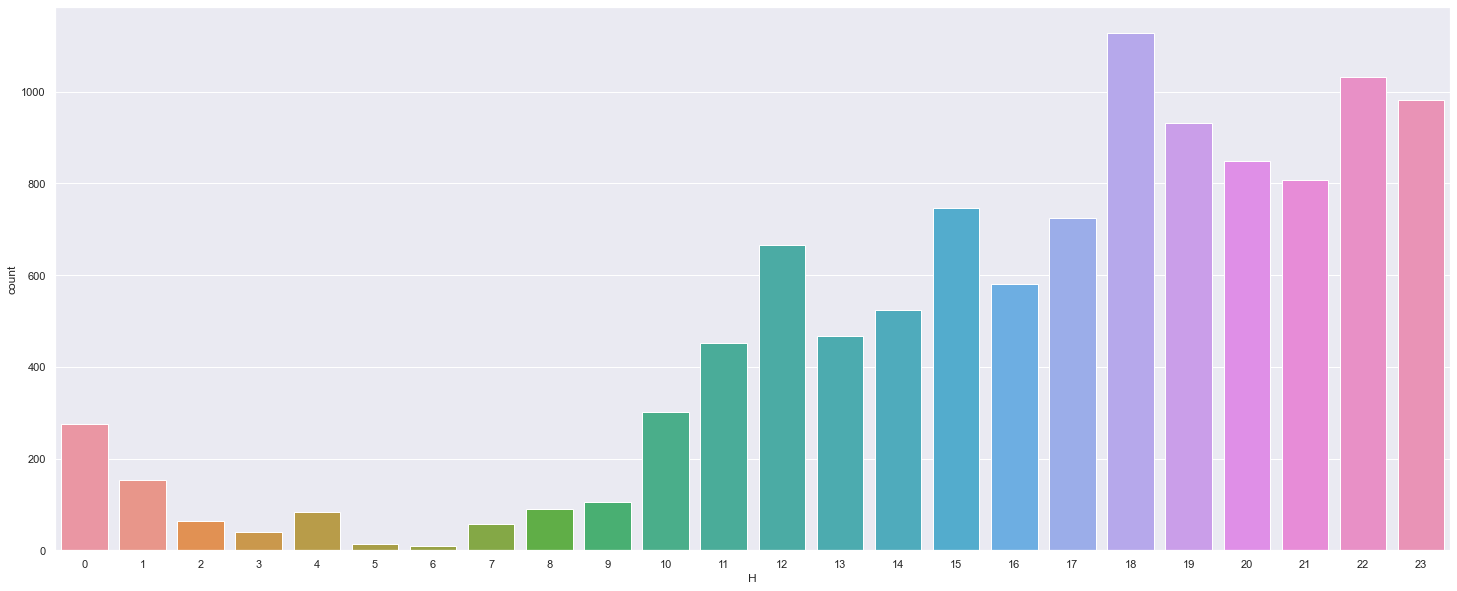

In [238]:
sns.countplot(x = df["H"], data = df)

## Day of the week 

<AxesSubplot:xlabel='Day_of_week', ylabel='count'>

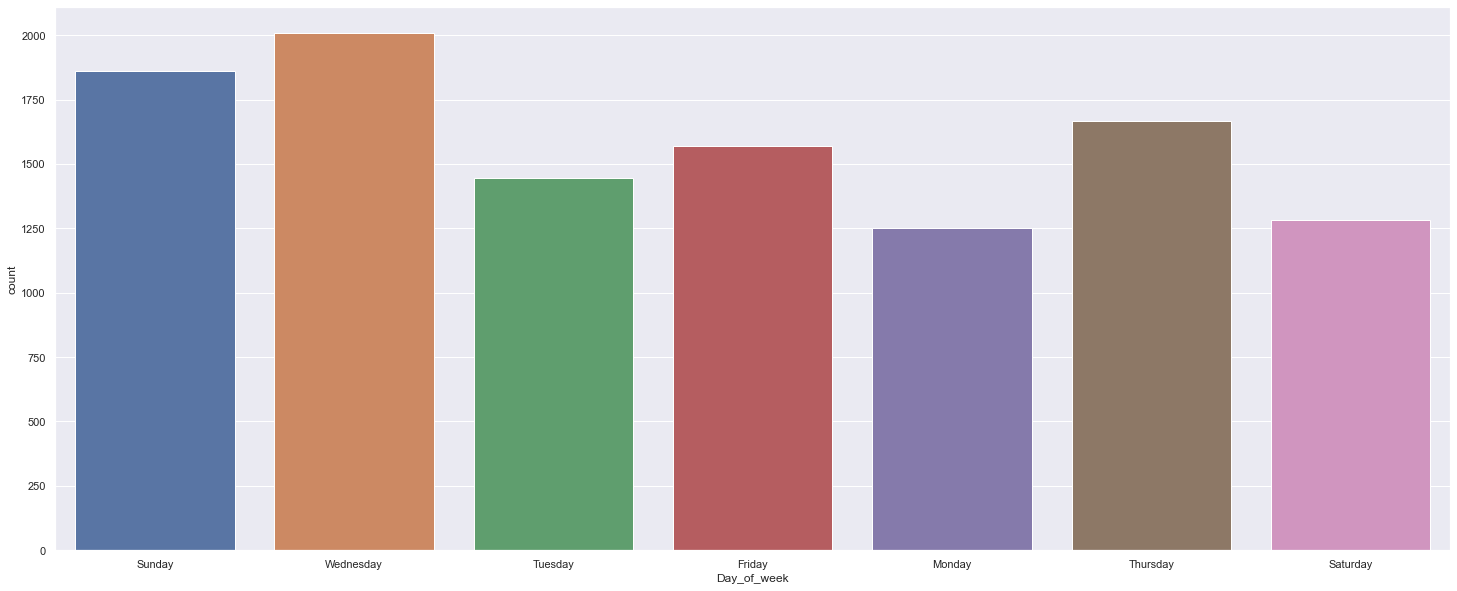

In [239]:
sns.countplot(x =  df["Day_of_week"], data = df )

## Day of the week and schedule

<AxesSubplot:xlabel='Day_of_week', ylabel='count'>

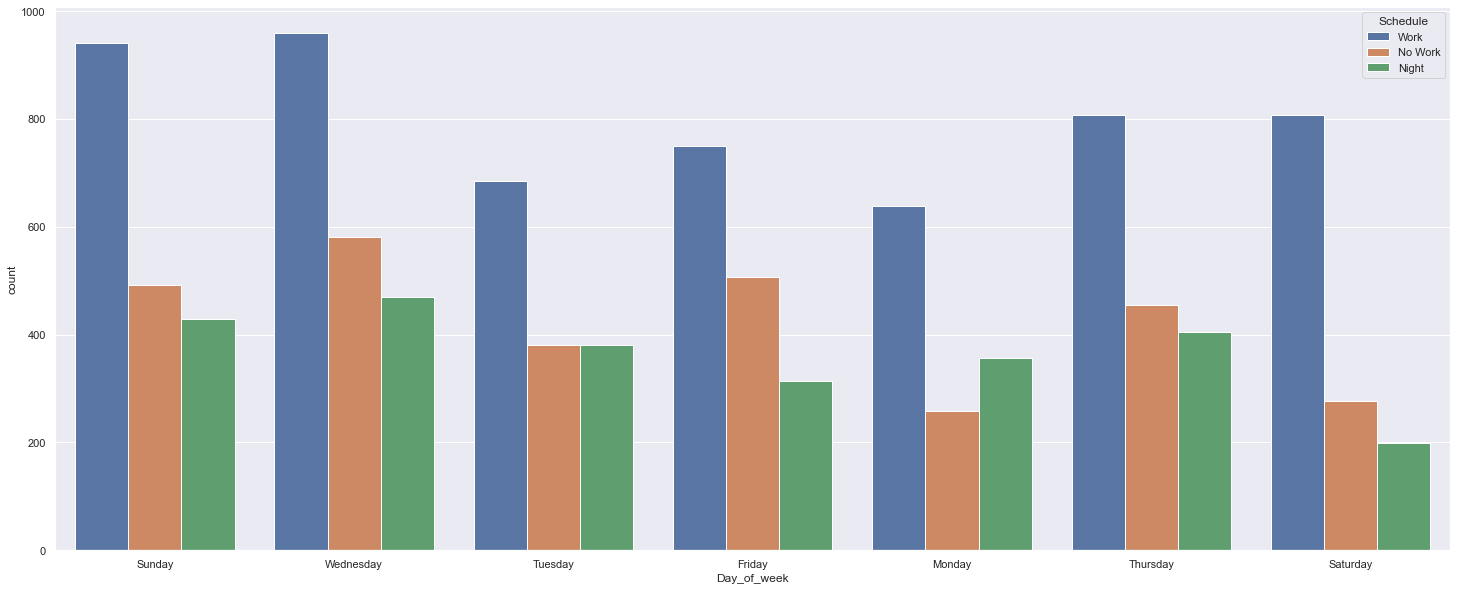

In [240]:
sns.countplot(x =  df["Day_of_week"], data = df, hue = df["Schedule"] )

## Number of messages sent each one

Berta    0.628574
Enric    0.371426
Name: Name, dtype: float64


<AxesSubplot:xlabel='Name', ylabel='count'>

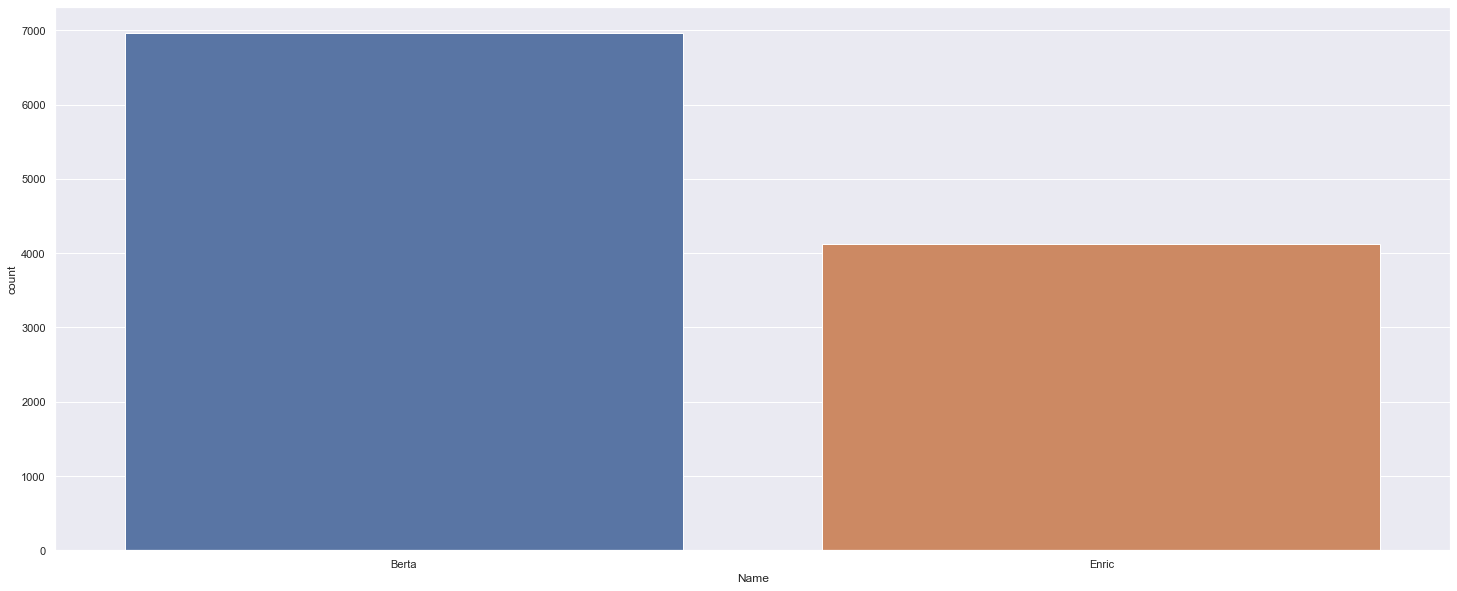

In [241]:
print(df["Name"].value_counts(normalize = True))
sns.countplot(x = df["Name"], data = df)

## Number of characters send it each one

AxesSubplot(0.125,0.125;0.775x0.755)


,Len
Name,
Berta,110516
Enric,151919


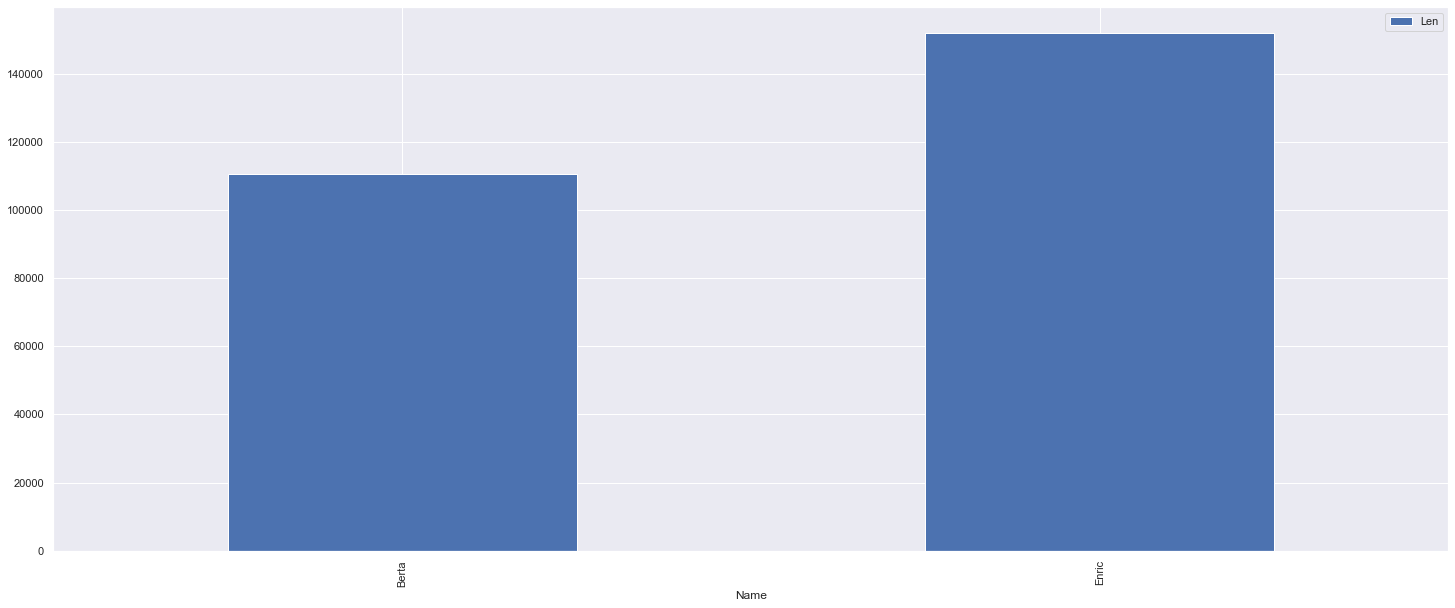

In [242]:
print(df.groupby(df["Name"]).agg({"Len":"sum"}).plot(kind = "bar"))
df.groupby(df["Name"]).agg({"Len":"sum"})

## Average of characters for message:

,Len
Name,
Berta,15.858229
Enric,36.891452


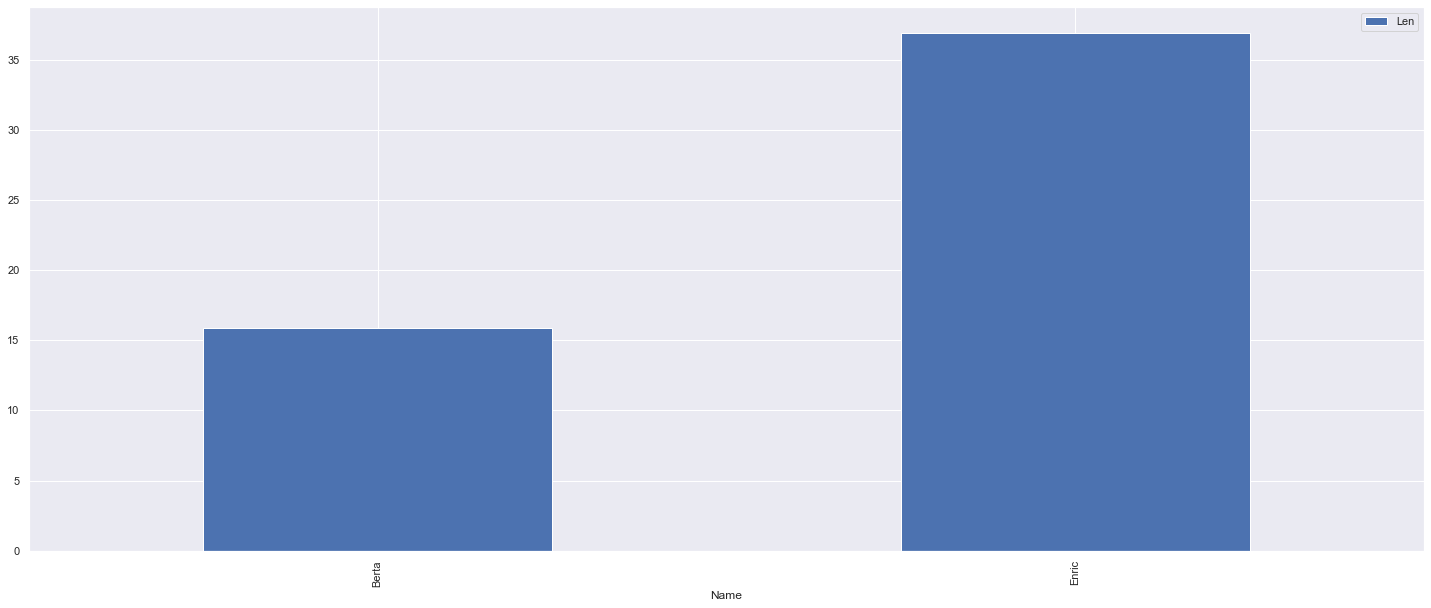

In [243]:
df.groupby(df["Name"]).agg({"Len":"mean"}).plot(kind = "bar")
df.groupby(df["Name"]).agg({"Len":"mean"})

## Distribution during the differents weekdays and persons

<AxesSubplot:xlabel='Day_of_week', ylabel='Len'>

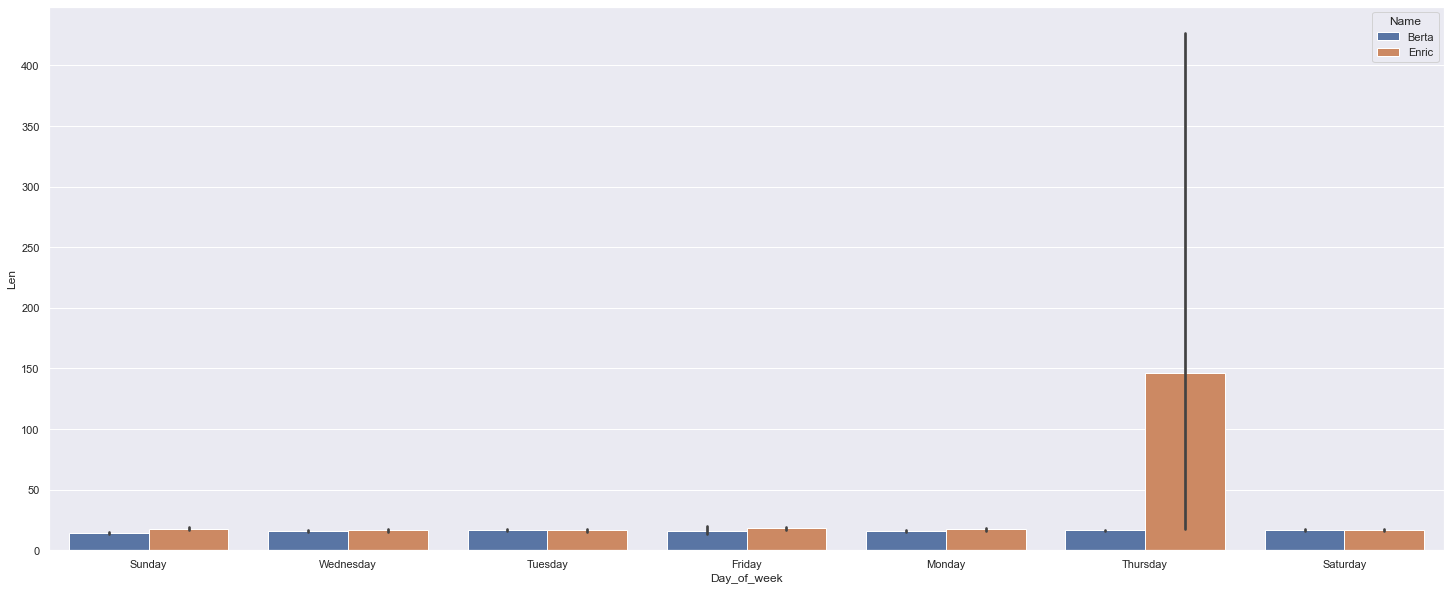

In [244]:
# Len of the messages for each day of the week

sns.barplot(x = df["Day_of_week"], y = df["Len"], data = df, hue = df["Name"])

<AxesSubplot:xlabel='Day_of_week', ylabel='count'>

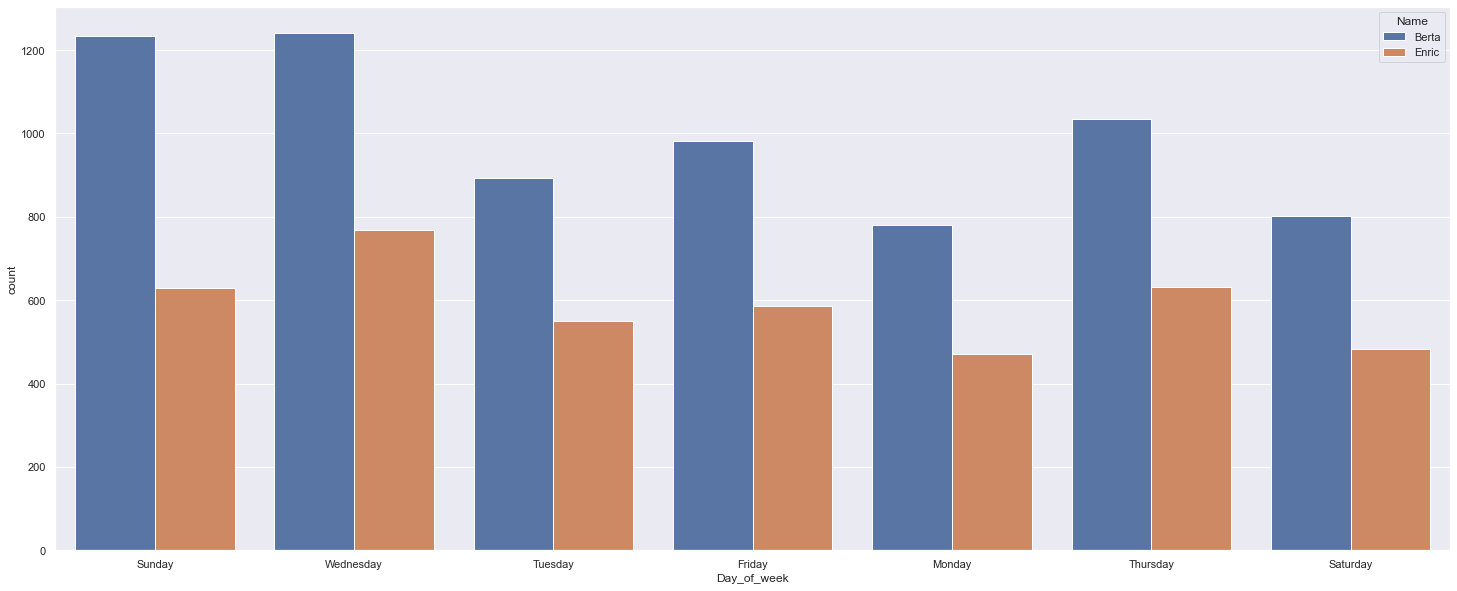

In [245]:
# number of the messages for each day of the week

sns.countplot(x = df["Day_of_week"], data = df, hue = df["Name"])

# Gruop all the missatges

In [246]:
# Crate a new column just to fill it after :

df["Change"] = "" 
df["Count"] = ""

# Max num of rows 

max_fun = df["Name"].count()
max_fun = max_fun - 1

C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/3344879144.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Change"] = ""
C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/3344879144.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Count"] = ""


In [247]:
# Create a loop that detects when it change writer, and count all the changes

# Get and Error but sill work
i = 0
coun = 0
while i <= max_fun:
    if (df["Name"].iloc[i+1] == df["Name"].iloc[i]):
        i = i + 1
        df["Change"].iloc[i]= 1
        
        
        df["Count"].iloc[i ] = coun
       
    else: 
        i = i + 1
        df["Change"].iloc[i] = 0
        
        coun = coun + 1
        df["Count"].iloc[i] = coun

C:\Users\Enric Roda\anaconda3\envs\kik_project\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


IndexError: single positional indexer is out-of-bounds

In [248]:
# Get the hour of the first message sent and the last:

df["First_H"] = df.drop_duplicates(subset = ["Count"], keep = "first")["Date - Hour"]
df["Last_H"] = df.drop_duplicates(subset = ["Count"], keep = "last")["Date - Hour"]
df

C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/3948727821.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["First_H"] = df.drop_duplicates(subset = ["Count"], keep = "first")["Date - Hour"]
C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/3948727821.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Last_H"] = df.drop_duplicates(subset = ["Count"], keep = "last")["Date - Hour"]


,Date,Hour,Name,Content,Len,Date - Hour,Day_of_week,H,Hora,Schedule,Change,Count,First_H,Last_H
0,15/12/19,2021-10-28 11:00:44,Berta,Menjem els ous,14,2019-12-15 11:00:44,Sunday,11,2021-10-28 11:00:44,Work,,,2019-12-15 11:00:44,2019-12-15 11:00:44
1,15/12/19,2021-10-28 15:29:36,Berta,Kiiikeleekk,11,2019-12-15 15:29:36,Sunday,15,2021-10-28 15:29:36,Work,1,0,2019-12-15 15:29:36,2019-12-15 15:29:36
2,15/12/19,2021-10-28 15:59:31,Enric,Keik,4,2019-12-15 15:59:31,Sunday,15,2021-10-28 15:59:31,Work,0,1,2019-12-15 15:59:31,NaT
3,15/12/19,2021-10-28 18:48:05,Enric,Passem stikers,14,2019-12-15 18:48:05,Sunday,18,2021-10-28 18:48:05,Work,1,1,NaT,2019-12-15 18:48:05
4,15/12/19,2021-10-28 18:50:05,Berta,‎enganxina omesa,16,2019-12-15 18:50:05,Sunday,18,2021-10-28 18:50:05,Work,0,2,2019-12-15 18:50:05,NaT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,24/10/21,2021-10-28 18:18:30,Berta,Tot això es ganancia,20,2021-10-24 18:18:30,Sunday,18,2021-10-28 18:18:30,Work,1,4660,NaT,2021-10-24 18:18:30
11096,24/10/21,2021-10-28 18:59:42,Enric,Pues bet365 me patrocina el bizzum no ? Jajajaj,47,2021-10-24 18:59:42,Sunday,18,2021-10-28 18:59:42,Work,0,4661,2021-10-24 18:59:42,2021-10-24 18:59:42
11097,24/10/21,2021-10-28 19:00:13,Berta,Ostia si,8,2021-10-24 19:00:13,Sunday,19,2021-10-28 19:00:13,No Work,0,4662,2021-10-24 19:00:13,NaT
11098,24/10/21,2021-10-28 19:00:15,Berta,Quan era?,9,2021-10-24 19:00:15,Sunday,19,2021-10-28 19:00:15,No Work,1,4662,NaT,NaT


In [258]:
# Group the mensatgess of the same writer together until it change
df_gr = df.groupby(df["Count"]).first()

# Drop the Len because is just for a line and we want the len of all the group 
df_gr.drop("Len" ,axis = 1, inplace = True )

In [259]:
# Group the df and sum all the Len:
df_gr_Len = df.groupby(df["Count"]).agg({"Len":"sum"})

In [260]:
# Merge both the df
df_gr = df_gr.merge( right = df_gr_Len, left_index= True, right_index=True )

In [261]:
# Convert to datetime

df_gr["Last_H"] = pd.to_datetime(df_gr["Last_H"], format = "%Y-%m-%d %H:%M:%s")
df_gr["First_H"] = pd.to_datetime(df_gr["First_H"], format = "%Y-%m-%d %H:%M:%s")

# Calculate the waiting time:

In [262]:
# Create the column to fill:

df_gr["Time_waited"] = ""

In [263]:
# Calculate the waiting time:

#Get and Error but still work
i = 0
while i <= max_fun:
    df_gr["Time_waited"].iloc[i] = df_gr.iloc[i+1]["First_H"] - df_gr.iloc[i]["Last_H"]
    i = i + 1

C:\Users\Enric Roda\anaconda3\envs\kik_project\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


IndexError: single positional indexer is out-of-bounds

In [264]:
df_gr

,Date,Hour,Name,Content,Date - Hour,Day_of_week,H,Hora,Schedule,Change,First_H,Last_H,Len,Time_waited
Count,,,,,,,,,,,,,,
0,15/12/19,2021-10-28 15:29:36,Berta,Kiiikeleekk,2019-12-15 15:29:36,Sunday,15,2021-10-28 15:29:36,Work,1,2019-12-15 15:29:36,2019-12-15 15:29:36,11,0 days 00:29:55
1,15/12/19,2021-10-28 15:59:31,Enric,Keik,2019-12-15 15:59:31,Sunday,15,2021-10-28 15:59:31,Work,0,2019-12-15 15:59:31,2019-12-15 18:48:05,18,0 days 00:02:00
2,15/12/19,2021-10-28 18:50:05,Berta,‎enganxina omesa,2019-12-15 18:50:05,Sunday,18,2021-10-28 18:50:05,Work,0,2019-12-15 18:50:05,2019-12-15 18:51:37,3024,0 days 00:00:00
3,15/12/19,2021-10-28 18:51:37,Enric,Yayyyya,2019-12-15 18:51:37,Sunday,18,2021-10-28 18:51:37,Work,0,2019-12-15 18:51:37,2019-12-15 18:51:37,7,0 days 00:00:00
4,15/12/19,2021-10-28 18:51:37,Berta,‎enganxina omesa,2019-12-15 18:51:37,Sunday,18,2021-10-28 18:51:37,Work,0,2019-12-15 18:51:37,2019-12-15 18:51:38,64,0 days 00:00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4659,24/10/21,2021-10-28 18:17:04,Enric,Has guañat alguna ?,2021-10-24 18:17:04,Sunday,18,2021-10-28 18:17:04,Work,0,2021-10-24 18:17:04,2021-10-24 18:17:04,19,0 days 00:01:18
4660,24/10/21,2021-10-28 18:18:22,Berta,Si bro,2021-10-24 18:18:22,Sunday,18,2021-10-28 18:18:22,Work,0,2021-10-24 18:18:22,2021-10-24 18:18:30,26,0 days 00:41:12
4661,24/10/21,2021-10-28 18:59:42,Enric,Pues bet365 me patrocina el bizzum no ? Jajajaj,2021-10-24 18:59:42,Sunday,18,2021-10-28 18:59:42,Work,0,2021-10-24 18:59:42,2021-10-24 18:59:42,47,0 days 00:00:31


In [265]:
# Delete the last  rows:

df_gr = df_gr.drop(df_gr.index[-1])

In [271]:
# The last row is the one we have to predict, so leave  it at 0 days 0 h 0 mins 

df_gr["Time_waited"].iloc[-1] = ("0 days 0 hours 0 minute")

C:\Users\Enric Roda\anaconda3\envs\kik_project\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [272]:
df_gr

,Date,Hour,Name,Content,Date - Hour,Day_of_week,H,Hora,Schedule,Change,First_H,Last_H,Len,Time_waited
Count,,,,,,,,,,,,,,
0,15/12/19,2021-10-28 15:29:36,Berta,Kiiikeleekk,2019-12-15 15:29:36,Sunday,15,2021-10-28 15:29:36,Work,1,2019-12-15 15:29:36,2019-12-15 15:29:36,11,0 days 00:29:55
1,15/12/19,2021-10-28 15:59:31,Enric,Keik,2019-12-15 15:59:31,Sunday,15,2021-10-28 15:59:31,Work,0,2019-12-15 15:59:31,2019-12-15 18:48:05,18,0 days 00:02:00
2,15/12/19,2021-10-28 18:50:05,Berta,‎enganxina omesa,2019-12-15 18:50:05,Sunday,18,2021-10-28 18:50:05,Work,0,2019-12-15 18:50:05,2019-12-15 18:51:37,3024,0 days 00:00:00
3,15/12/19,2021-10-28 18:51:37,Enric,Yayyyya,2019-12-15 18:51:37,Sunday,18,2021-10-28 18:51:37,Work,0,2019-12-15 18:51:37,2019-12-15 18:51:37,7,0 days 00:00:00
4,15/12/19,2021-10-28 18:51:37,Berta,‎enganxina omesa,2019-12-15 18:51:37,Sunday,18,2021-10-28 18:51:37,Work,0,2019-12-15 18:51:37,2019-12-15 18:51:38,64,0 days 00:00:01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4658,23/10/21,2021-10-28 00:09:53,Berta,‎Imatge omesa,2021-10-23 00:09:53,Saturday,0,2021-10-28 00:09:53,Night,0,2021-10-23 00:09:53,2021-10-24 18:14:42,26,0 days 00:02:22
4659,24/10/21,2021-10-28 18:17:04,Enric,Has guañat alguna ?,2021-10-24 18:17:04,Sunday,18,2021-10-28 18:17:04,Work,0,2021-10-24 18:17:04,2021-10-24 18:17:04,19,0 days 00:01:18
4660,24/10/21,2021-10-28 18:18:22,Berta,Si bro,2021-10-24 18:18:22,Sunday,18,2021-10-28 18:18:22,Work,0,2021-10-24 18:18:22,2021-10-24 18:18:30,26,0 days 00:41:12


In [273]:
df_gr["Time_waited"] = pd.to_timedelta(df_gr["Time_waited"])

In [274]:
# When you send just a message at the same time maybe the time of waiting could be negative, this function convert it in 0

def min_des (h):
    
     # Negative minute
    m_neg = pd.Timedelta("0 days 0 hours 0 minute") - pd.Timedelta("0 days 0 hours 1 minute")
    
    # The time is negative, but less than a minute    
    if( h< pd.Timedelta("0 days 0 hours 0 minute")) and (h > m_neg):
        return (pd.Timedelta("0 days 0 hours 0 minute"))
            
    
    # 10 days negative
    d_neg = pd.Timedelta("0 days 0 hours 0 minute") - pd.Timedelta("1000 days 0 hours 1 minute")
    
    # If it get a more than 10 days negative is aleatori, so I put a mean of 1h 30 mins
    if( h < pd.Timedelta("0 days 0 hours 0 minute")) and (h > d_neg):
        return (pd.Timedelta("0 days 1 hours 30 minute"))
    
    # If the waiting time is more than a week is not a waiting time so we put a waiting time average of 1h 30 mins
    if ( h > pd.Timedelta("7 days 0 hours 0 minute")):
        return (pd.Timedelta("0 days 1 hours 30 minute"))
        
    
    else:
        return h
    
# Apply the funccion.    
df_gr["Time_waited"] = df_gr["Time_waited"].apply(min_des)    

In [275]:
# Convert 
df_gr["Time_waited"] = pd.to_timedelta(df_gr["Time_waited"])

In [276]:
# Function that return if the waiting time is more than 4h
def espera (h):
    if h > pd.Timedelta("0 days 4 hours"):
        return "+ 4h"
    else:
        return "-4 h"
df_gr["More than 4h"] = df_gr["Time_waited"].apply(espera)

In [277]:
# See how many are of each of more that 4h or not
df_gr["More than 4h"].value_counts()

-4 h    4449
+ 4h     214
Name: More than 4h, dtype: int64

In [278]:
# Not count the time of sleep as wating

def Time_waited_night (h, m4, tw):
    if (h == "Night") and m4 == "+ 4h":
        return (pd.Timedelta("0 days 1 hours 26 minute"))
    else:
        return tw
        
df_gr["Time_waited"] = df_gr.apply(lambda x: Time_waited_night (x["Schedule"], x["More than 4h"], x["Time_waited"] ), axis = 1)

        
    

In [279]:
# Select the name of the persons
name1 = df_gr["Name"].iloc[0]
name2 = df_gr["Name"].iloc[1]

# Average of waiting time
time_W_name1 = df_gr[df_gr["Name"]== name1]["Time_waited"].mean()
time_W_name2 = df_gr[df_gr["Name"]== name2]["Time_waited"].mean()
time_W_Average = df_gr["Time_waited"].mean()

# Time waite name1 respect for name 2  
p1_respecte_p2 = (time_W_name1 / time_W_name2) * 100
p1_respecte_p2 = int(p1_respecte_p2)


print("The average time of waiting is:", time_W_Average )
print(name1, "has wait", time_W_name1 )
print(name2, "has wait", time_W_name2 )
print("")
print(name1 , "has wait ", p1_respecte_p2 , "%, respect" , name2)

The average time of waiting is: 0 days 00:52:04.537422260
Berta has wait 0 days 00:42:48.842195540
Enric has wait 0 days 01:01:20.471042471

Berta has wait  69 %, respect Enric


# Reporte Semanal

In [280]:
# Convert the Date to datetime
df_gr['Date'] = pd.to_datetime(df_gr["Date"], format = "%d/%m/%y")

In [281]:
# Select the first day of the week and the last day

last_day = df_gr.iloc[-1]["Date"]

first_day_last_week = last_day - pd.Timedelta("7 days 0 hours 0 minute")

In [282]:
# Create a df with a the data of the last week

df_last_week = df_gr[df_gr["Date"]>=first_day_last_week]

In [283]:
# Number of week

df_gr["Week"] = df_gr ["Date"].dt.week

C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/390829231.py:3: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated.  Please use Series.dt.isocalendar().week instead.
  df_gr["Week"] = df_gr ["Date"].dt.week


In [284]:
# Column of waiting time in seconds 
df_gr["Time_waited_in_s"] = df_gr["Time_waited"].dt.total_seconds()

In [285]:
# Time waiting of the last week:

time_WLW_name1 = df_last_week[df_last_week["Name"]== name1]["Time_waited"].mean()
time_WLW_name2 = df_last_week[df_last_week["Name"]== name2]["Time_waited"].mean()
time_WLW_Average = df_last_week["Time_waited"].mean()

In [286]:
df['Date'] = pd.to_datetime(df["Date"], format = "%d/%m/%y")
df_week = df[df["Date"]>=first_day_last_week]

C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/2100083907.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df["Date"], format = "%d/%m/%y")


## Percent of waiting time respect the mean

In [287]:
# Time waiting Person one of the last week respect of the mean

p1_lastweek_respecte_p1 = (time_WLW_name1 / time_W_name1) * 100
p1_lastweek_respecte_p1 = int(p1_lastweek_respecte_p1)
print(name1, "has wait", p1_lastweek_respecte_p1, "% respect the mean, this week")

p2_lastweek_respecte_p2 = (time_WLW_name2 / time_W_name2) * 100
p2_lastweek_respecte_p2 = int(p2_lastweek_respecte_p2)
print(name2, "has wait", p2_lastweek_respecte_p2, "% respect the mean, this week")


p1_respecte_p2_Lweek = (time_WLW_name1 / time_WLW_name2) * 100
p1_respecte_p2_Lweek = int(p1_respecte_p2_Lweek)


print("")
print(name1 , "has wait ", p1_respecte_p2_Lweek , "%, respect" , name2, "this week")

Berta has wait 496 % respect the mean, this week
Enric has wait 37 % respect the mean, this week

Berta has wait  925 %, respect Enric this week


## Evolution of time waited total:

<AxesSubplot:xlabel='Date'>

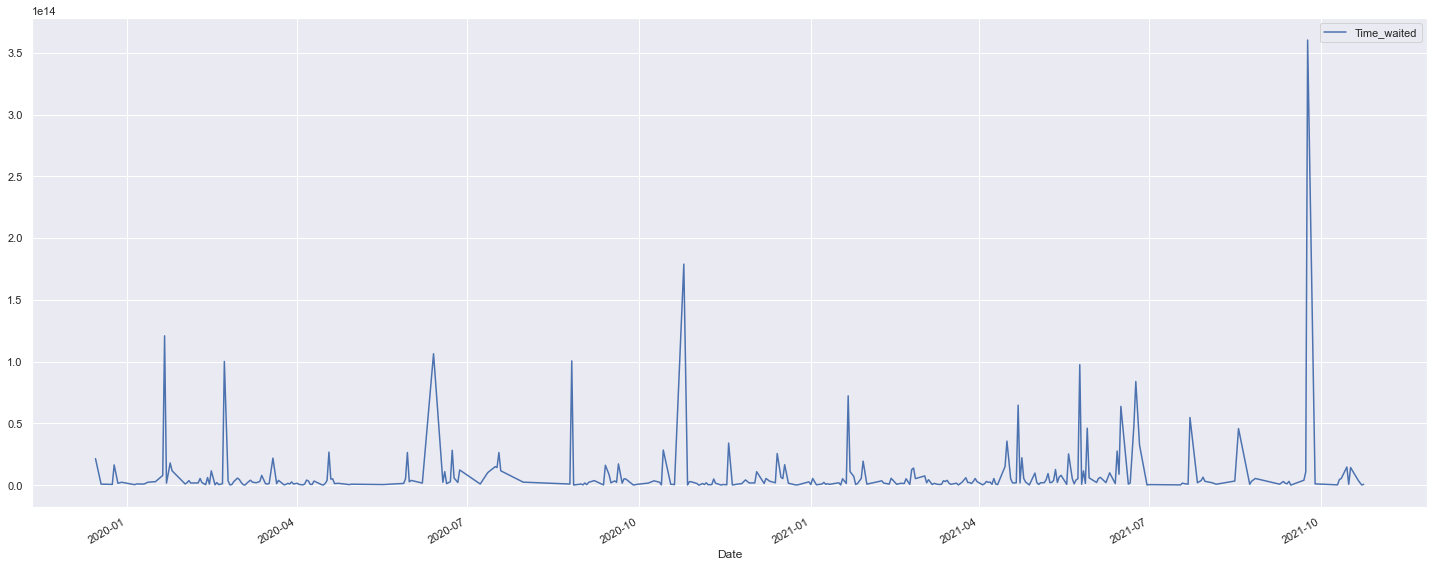

In [288]:
df_gr.groupby(df_gr["Date"]).agg({"Time_waited":"mean"}).plot()

## Evolution of time waited this week:

<AxesSubplot:xlabel='Date'>

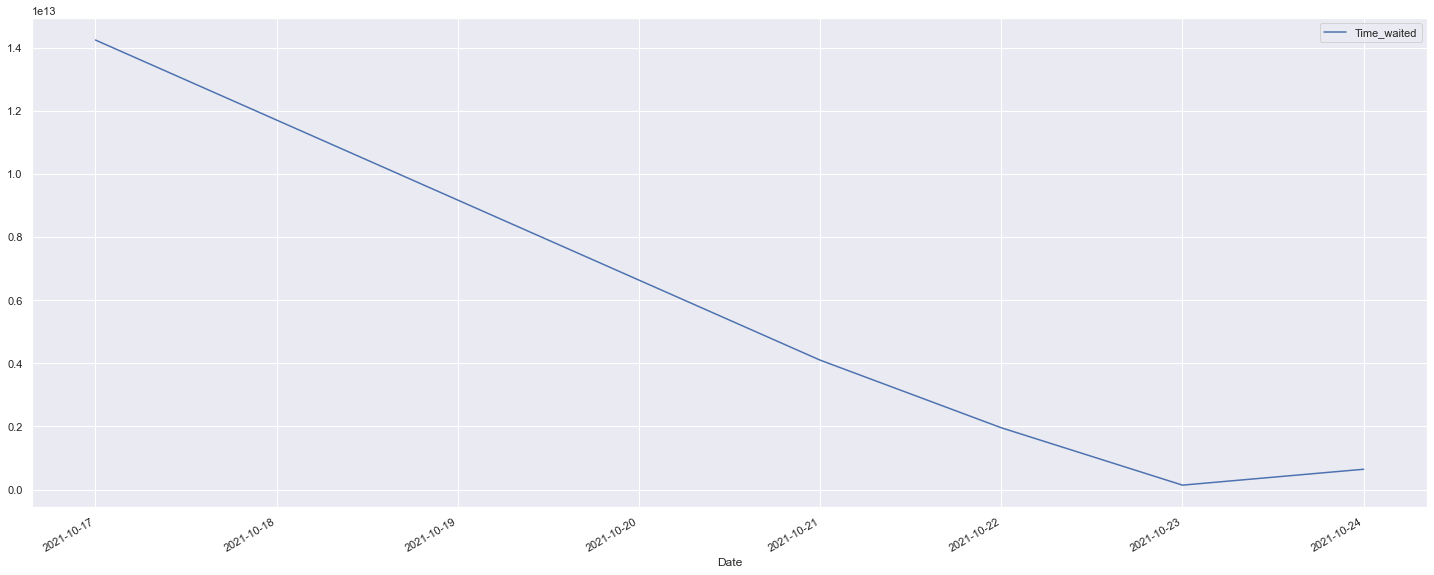

In [289]:
df_last_week.groupby(df_last_week["Date"]).agg({"Time_waited":"mean"}).plot()

## More texted hours

No handles with labels found to put in legend.


The first plot is this week, the second is all the data


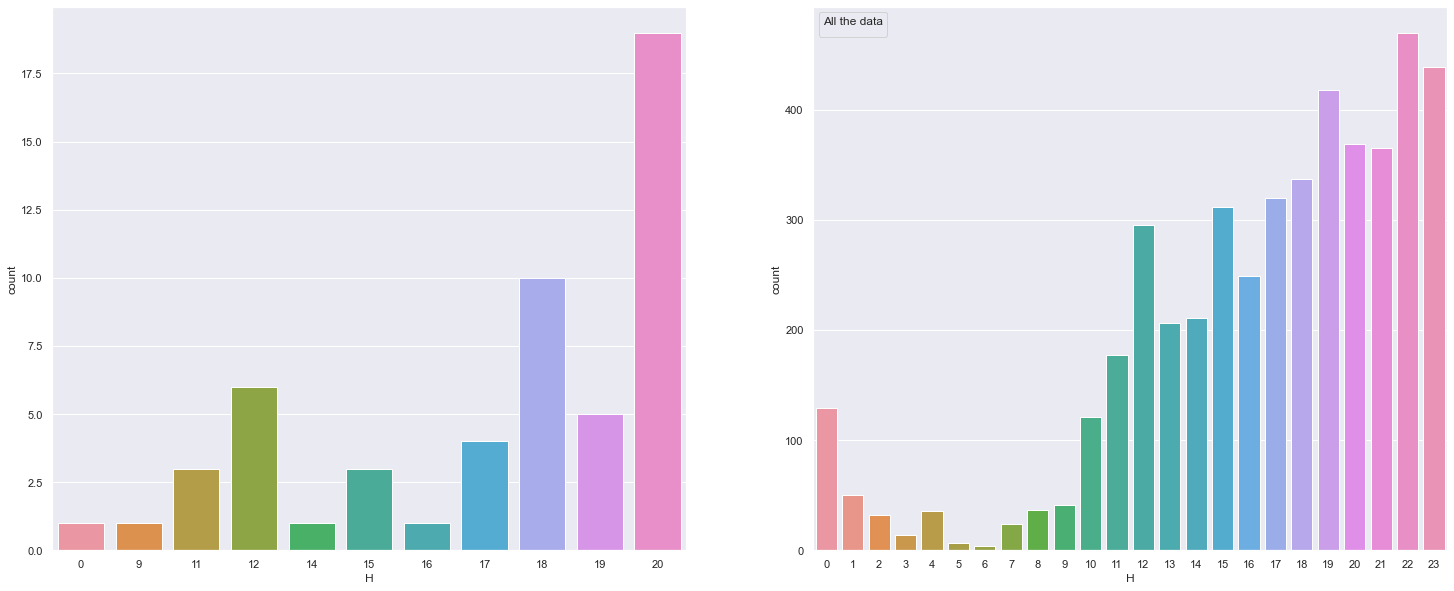

In [290]:
fig, axs = plt.subplots(ncols=2)

sns.set(rc={'figure.figsize':(35,20)})
sns.countplot(x = df_last_week["H"], data = df_last_week, ax=axs[0])
plt.legend(title='All the data')
sns.countplot(x = df_gr["H"], data = df_gr, ax=axs[1])
print("The first plot is this week, the second is all the data")

## Schedule during the text

No handles with labels found to put in legend.


The first plot is this week, the second is all the data


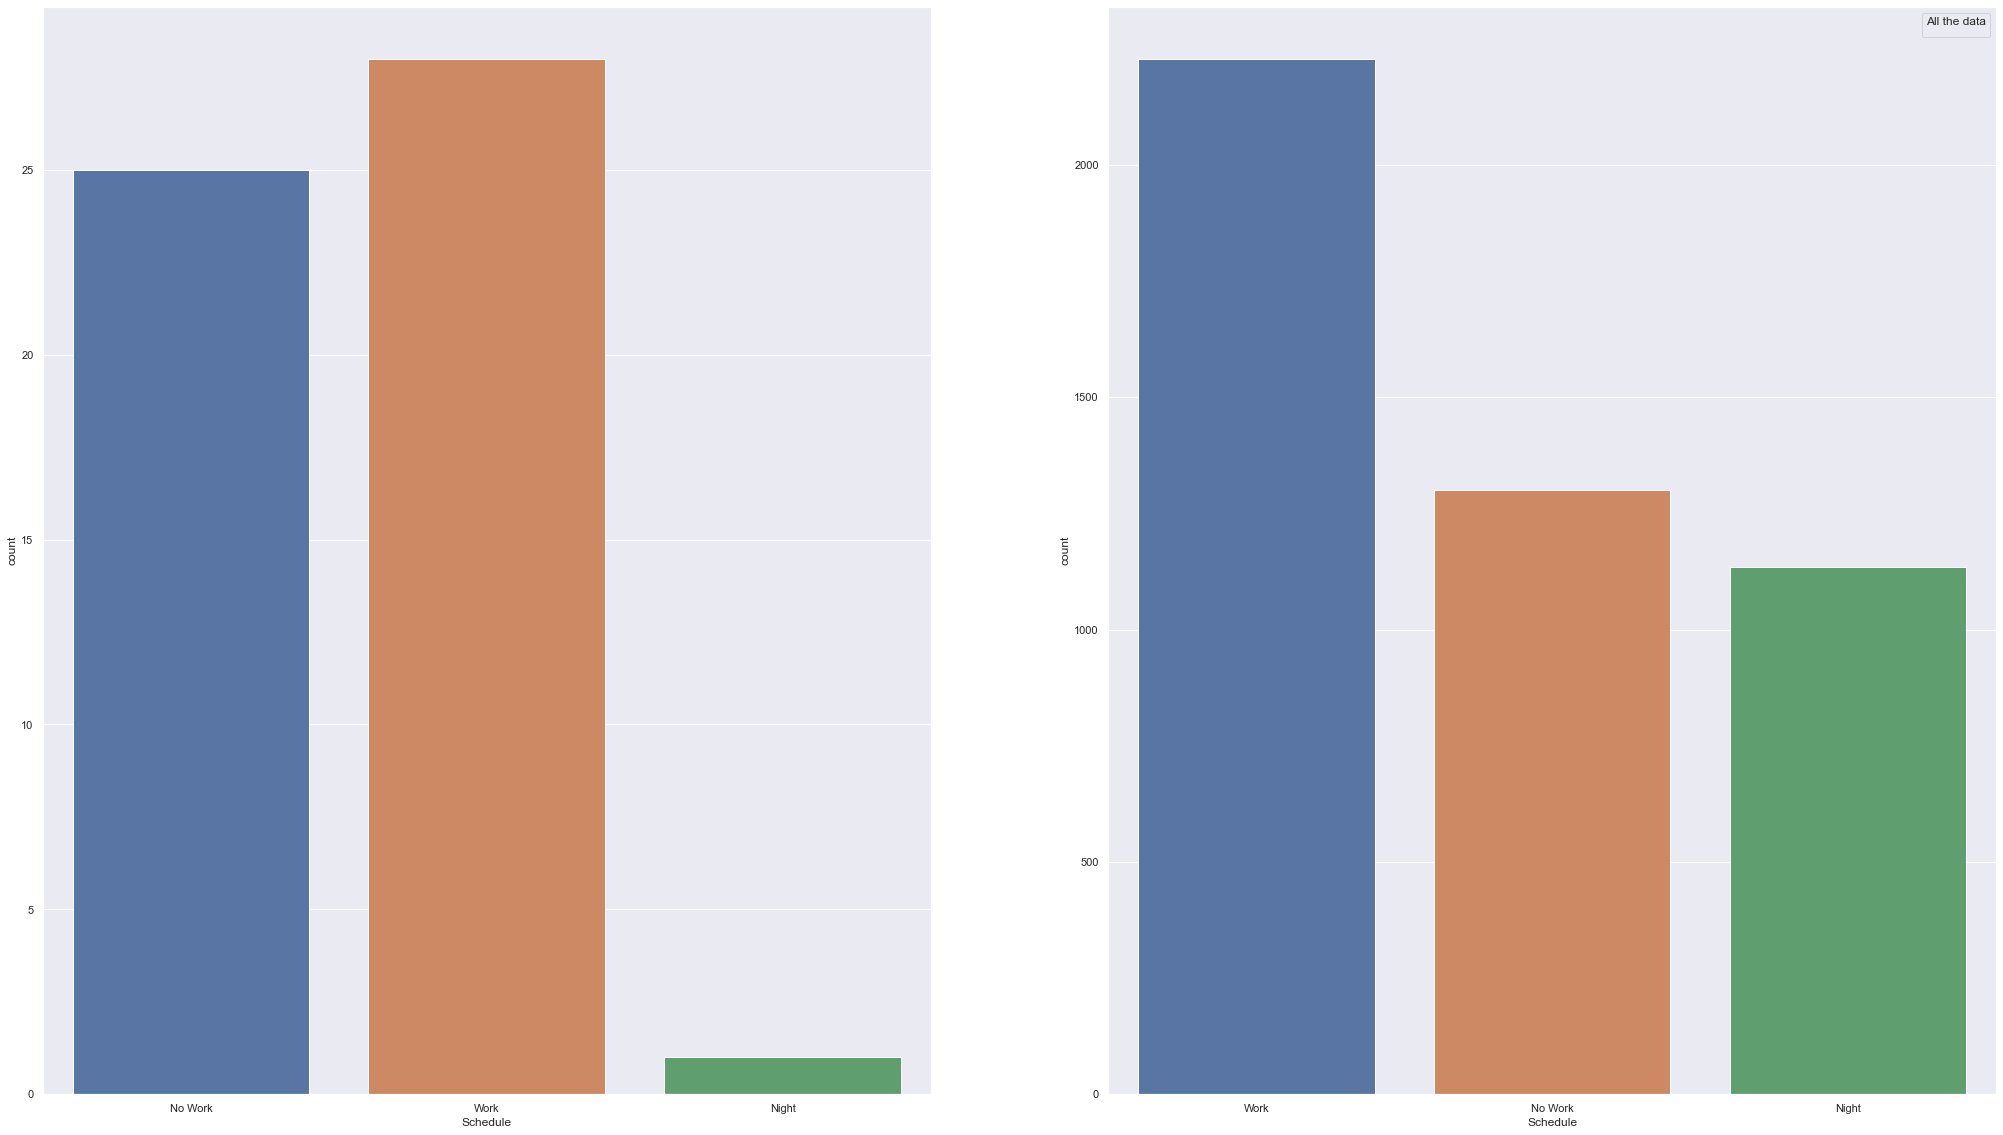

In [291]:
fig, axs = plt.subplots(ncols=2)

sns.set(rc={'figure.figsize':(7,3)})
sns.countplot(x =  df_last_week["Schedule"], data = df_last_week, ax=axs[0])
plt.legend(title='All the data')
sns.countplot(x =  df_gr["Schedule"], data = df_gr, ax=axs[1])
print("The first plot is this week, the second is all the data")

In [292]:
# Crate a df without the messages  grouped of the last week:

df['Date'] = pd.to_datetime(df["Date"], format = "%d/%m/%y")
df_week = df[df["Date"]>=first_day_last_week]
df_week

C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/214139498.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df["Date"], format = "%d/%m/%y")


,Date,Hour,Name,Content,Len,Date - Hour,Day_of_week,H,Hora,Schedule,Change,Count,First_H,Last_H
10974,2021-10-17,2021-10-28 19:53:57,Berta,https,5,2021-10-17 19:53:57,Sunday,19,2021-10-28 19:53:57,No Work,1,4608,NaT,NaT
10975,2021-10-17,2021-10-28 19:54:15,Berta,Si vas a bruseles amb la xurri,30,2021-10-17 19:54:15,Sunday,19,2021-10-28 19:54:15,No Work,1,4608,NaT,NaT
10976,2021-10-17,2021-10-28 19:54:21,Berta,Aquí tens un descompte,22,2021-10-17 19:54:21,Sunday,19,2021-10-28 19:54:21,No Work,1,4608,NaT,2021-10-17 19:54:21
10977,2021-10-17,2021-10-28 19:56:32,Enric,jajajaja gracies papi pero ja ho hem pillat tot,47,2021-10-17 19:56:32,Sunday,19,2021-10-28 19:56:32,No Work,0,4609,2021-10-17 19:56:32,NaT
10978,2021-10-17,2021-10-28 19:56:39,Enric,com va anar ahir la party ?,27,2021-10-17 19:56:39,Sunday,19,2021-10-28 19:56:39,No Work,1,4609,NaT,2021-10-17 19:56:39
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11095,2021-10-24,2021-10-28 18:18:30,Berta,Tot això es ganancia,20,2021-10-24 18:18:30,Sunday,18,2021-10-28 18:18:30,Work,1,4660,NaT,2021-10-24 18:18:30
11096,2021-10-24,2021-10-28 18:59:42,Enric,Pues bet365 me patrocina el bizzum no ? Jajajaj,47,2021-10-24 18:59:42,Sunday,18,2021-10-28 18:59:42,Work,0,4661,2021-10-24 18:59:42,2021-10-24 18:59:42
11097,2021-10-24,2021-10-28 19:00:13,Berta,Ostia si,8,2021-10-24 19:00:13,Sunday,19,2021-10-28 19:00:13,No Work,0,4662,2021-10-24 19:00:13,NaT
11098,2021-10-24,2021-10-28 19:00:15,Berta,Quan era?,9,2021-10-24 19:00:15,Sunday,19,2021-10-28 19:00:15,No Work,1,4662,NaT,NaT


## Len

#### Historic data:

          Len
Name         
Berta  110516
Enric  151919
AxesSubplot(0.125,0.125;0.775x0.755)


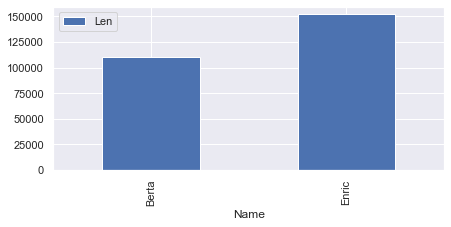

In [293]:
print(df.groupby(df["Name"]).agg({"Len":"sum"}))
print(df.groupby(df["Name"]).agg({"Len":"sum"}).plot(kind= "bar"))

#### This week

        Len
Name       
Berta  1316
Enric   750


<AxesSubplot:xlabel='Name'>

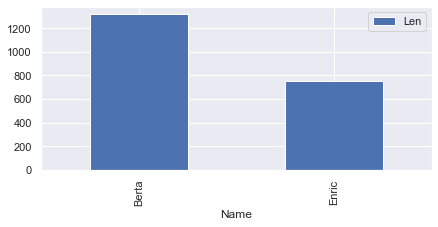

In [294]:
print(df_week.groupby(df_week["Name"]).agg({"Len":"sum"}))
df_week.groupby(df_week["Name"]).agg({"Len":"sum"}).plot(kind= "bar")



#### Evolution of the len of the messages

<AxesSubplot:xlabel='Week'>

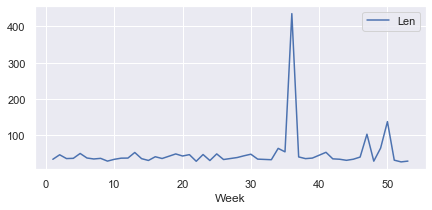

In [295]:
df_gr.groupby(df_gr["Week"]).agg({"Len":"mean"}).plot()

## Number of messatges

No handles with labels found to put in legend.


The first plot is this week, the second is all the data


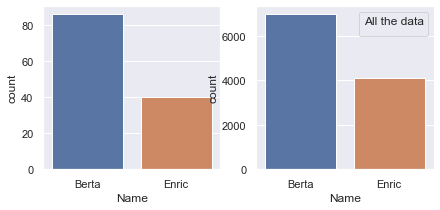

In [296]:
fig, axs = plt.subplots(ncols=2)

sns.set(rc={'figure.figsize':(15,5)})
sns.countplot( data = df_week, x= df_week["Name"], ax=axs[0])
plt.legend(title='All the data')
sns.countplot( data = df, x= df["Name"], ax=axs[1])
print("The first plot is this week, the second is all the data")

###  Evolution per weeks

<AxesSubplot:xlabel='Week', ylabel='count'>

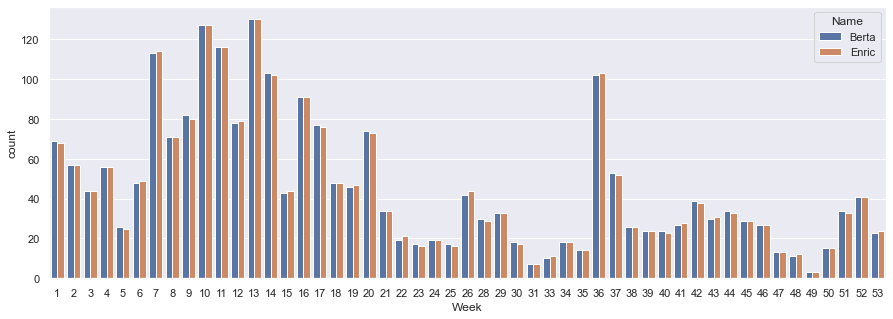

In [297]:
sns.countplot( data = df_gr, x = df_gr["Week"], hue =df_gr["Name"] )

## Waiting time

### Evolution of waiting time per week

<AxesSubplot:xlabel='Week'>

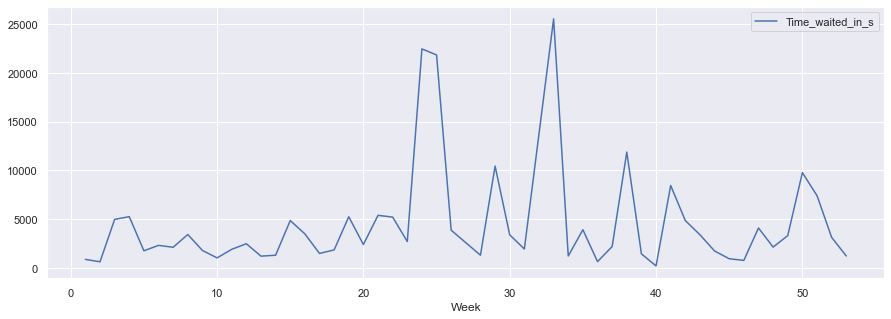

In [298]:
df_gr.groupby(df_gr["Week"]).agg({"Time_waited_in_s":"mean"}).plot()

In [299]:
df_time_waited = df_gr.groupby(df_gr["Name"]).agg({"Time_waited_in_s":"mean"})

## Waiting time

<AxesSubplot:xlabel='Name'>

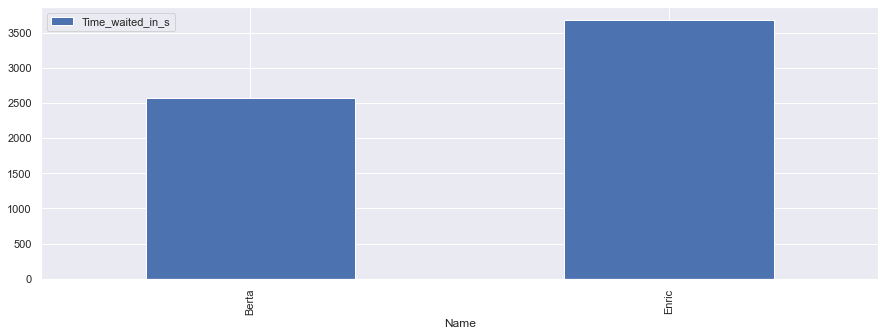

In [300]:
df_time_waited.plot(kind = "bar")

In [301]:
df_gr["Time_waited_in_s"] = df_gr["Time_waited"].dt.total_seconds()

<AxesSubplot:xlabel='Week', ylabel='Time_waited_in_s'>

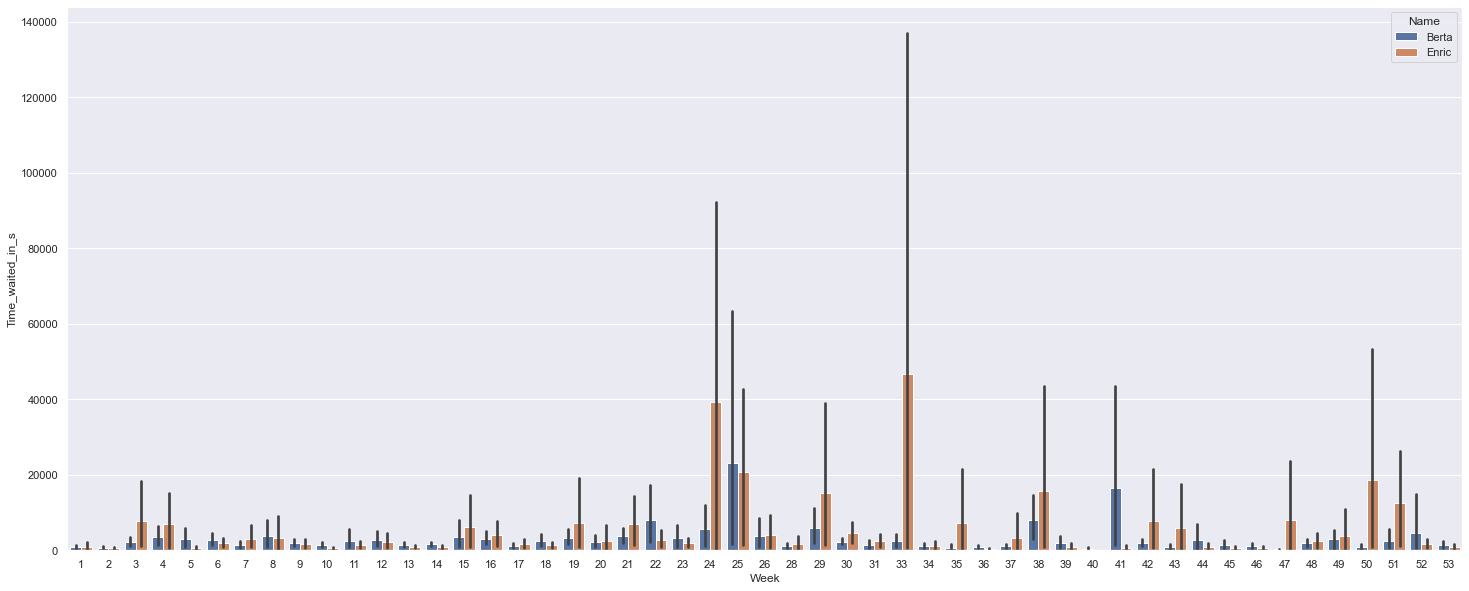

In [302]:
sns.set(rc={'figure.figsize':(25,10)})
sns.barplot( x = df_gr["Week"], data = df_gr, y = df_gr["Time_waited_in_s"], hue = df_gr["Name"])

# Predict the hour of response:

## Convert the string columns to int to fit in the model

### Target Variable

In [303]:
df_gr["Time_waited_more1h"] = np.where(df_gr["Time_waited"]>= ("0 days 1 hours"),1, 0)

### Name

In [304]:
df_gr["Name_num"] = np.where(df_gr["Name"]== "Enric", 1, 0)  # Enric --> 1  Marie --> 0

In [305]:
df_gr.groupby(df_gr["Name_num"]).agg({"Time_waited_more1h":"mean"})

,Time_waited_more1h
Name_num,
0,0.156518
1,0.111540


### Schedule

In [306]:
def Schedule_to_int(hour):
    if (hour == "Work"):
        return 1
    if (hour == "No Work"):
        return 2
    if (hour == "Night"):
        return 3
df_gr["Schedule_int"] = df_gr["Schedule"].apply(Schedule_to_int)  

In [307]:
df_gr.groupby(df_gr["Schedule_int"]).agg({"Time_waited_more1h":"mean"})

,Time_waited_more1h
Schedule_int,
1,0.140934
2,0.129131
3,0.126102


### Day of the week

In [308]:
df_gr["Day_of_week"] = df_gr["Date - Hour"].dt.dayofweek

In [309]:
df_gr.groupby(df_gr["Day_of_week"]).agg({"Time_waited_more1h":"mean"})

,Time_waited_more1h
Day_of_week,
0,0.166045
1,0.116386
2,0.076835
3,0.142857
4,0.175719
5,0.163793
6,0.126270


### Group the Len:

In [310]:
def group_len (len_):
    if (len_ >= 90):
        return 1
    if (len_ >= 40) and (len_ < 90):
        return 2
    else:
        return 3
    
df_gr["group_Len"] = df_gr["Len"].apply(group_len)

In [311]:
df_gr.groupby(df_gr["group_Len"]).agg({"Time_waited_more1h":["mean","count"]})

Time_waited_more1h      
                        mean count
group_Len                         
1                   0.189415   359
2                   0.116764  1199
3                   0.134300  3105

In [312]:
df_gr["Time_waited_more1h"].mean()

0.134033883765816

<AxesSubplot:xlabel='Len', ylabel='Time_waited_in_s'>

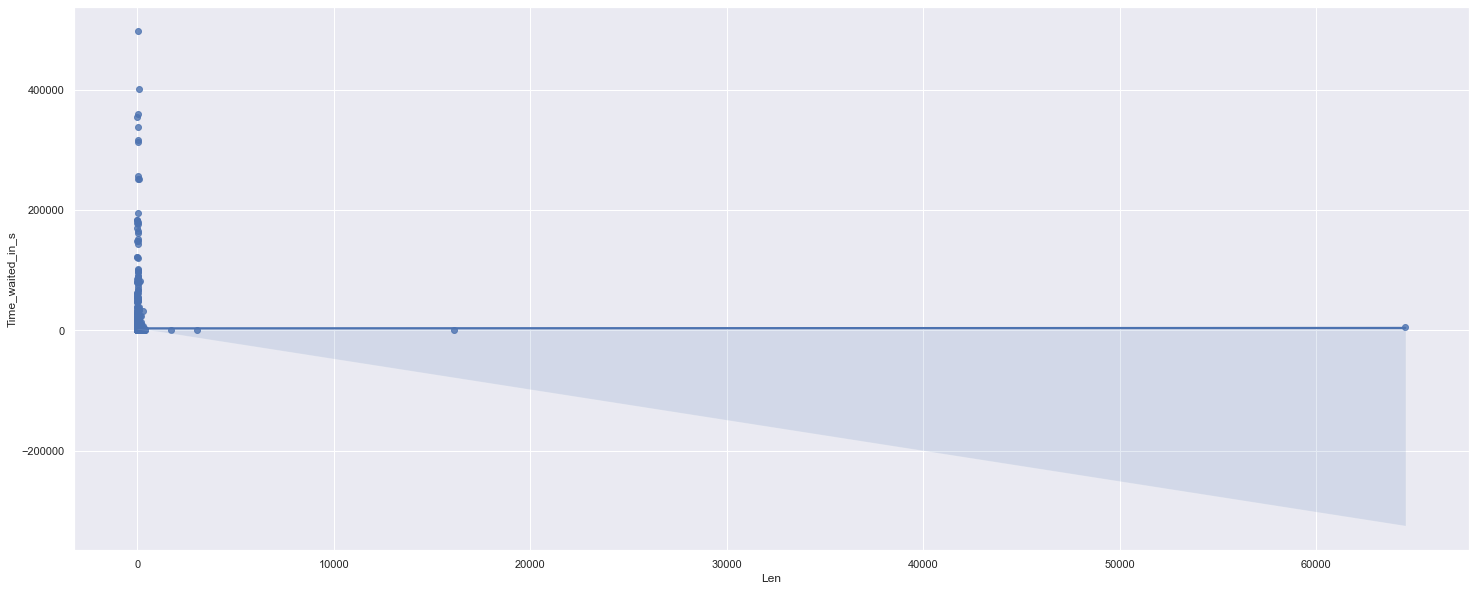

In [313]:
sns.regplot(data = df_gr, x = df_gr["Len"], y = df_gr["Time_waited_in_s"])

<AxesSubplot:xlabel='Len', ylabel='count'>

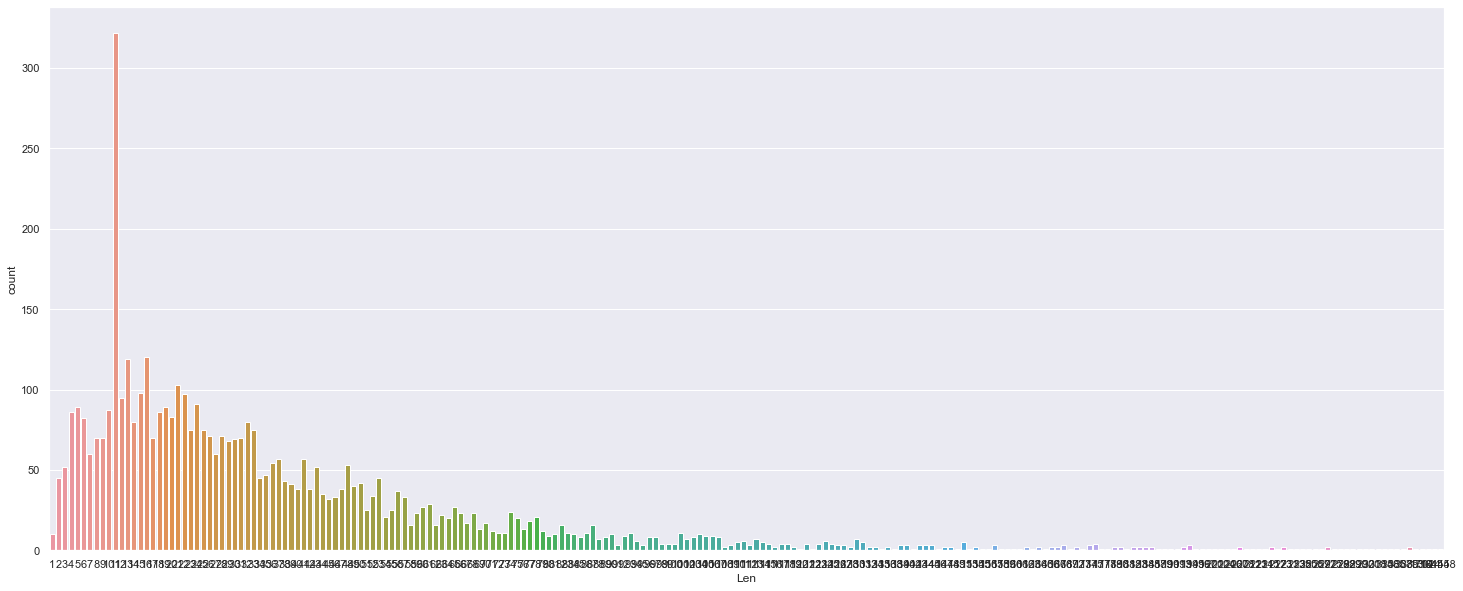

In [314]:
sns.countplot(data = df_gr, x = df_gr["Len"])

## Create a column of time waited in the message above

In [315]:
i = 1 
total_rows = df_gr["Schedule"].count() -1

df_gr["Time_Waited_before"] = ""
while i <= total_rows:
        
    df_gr["Time_Waited_before"].iloc[i] = df_gr["Time_waited"].iloc[i -1]
    
    i = i +1
    

C:\Users\Enric Roda\anaconda3\envs\kik_project\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [316]:
# Delet the first row because we don't have time waite before 
df_gr = df_gr.iloc[1: , :]

### Group the mensatges of the time waited to receive the message

In [317]:
def wait_time_before (h):
    if (h >= pd.Timedelta("0 days 1 hours") ):
        return 1
    if (h >= pd.Timedelta("0 days 0 hours 15 minutes") ):
        return 2
    else:
        return 3
    
df_gr["Wait_time_before_group"] = df_gr["Time_Waited_before"].apply(wait_time_before)

C:\Users\ENRICR~1\AppData\Local\Temp/ipykernel_5108/2592993230.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_gr["Wait_time_before_group"] = df_gr["Time_Waited_before"].apply(wait_time_before)


In [318]:
df_gr.groupby(df_gr["Wait_time_before_group"]).agg({"Time_waited_more1h":["mean","count"]})

Time_waited_more1h      
                                     mean count
Wait_time_before_group                         
1                                0.331200   625
2                                0.215800   519
3                                0.086981  3518

## Create a df for the model

In [319]:
columns_model = ["Day_of_week", "H", "Name_num", "Schedule_int", "group_Len", "Wait_time_before_group", "Time_waited_more1h"]

In [320]:
df_model = df_gr[columns_model]

In [321]:
df_model

,Day_of_week,H,Name_num,Schedule_int,group_Len,Wait_time_before_group,Time_waited_more1h
Count,,,,,,,
1,6,15,1,1,3,2,0
2,6,18,0,1,1,3,0
3,6,18,1,1,3,3,0
4,6,18,0,1,2,3,0
5,6,18,1,1,3,3,0
...,...,...,...,...,...,...,...
4658,5,0,0,3,3,1,0
4659,6,18,1,1,3,3,0
4660,6,18,0,1,3,3,0


In [322]:
#  Display the correlation of each feature of model

GL = df_model["Time_waited_more1h"]

for col in columns_model:
    print(df_model[col].name)
    print(np.corrcoef(GL, df_model[col]))
    print("________________________________________________________")

Day_of_week
[[1.         0.02161616]
 [0.02161616 1.        ]]
________________________________________________________
H
[[ 1.         -0.11019577]
 [-0.11019577  1.        ]]
________________________________________________________
Name_num
[[ 1.         -0.06610281]
 [-0.06610281  1.        ]]
________________________________________________________
Schedule_int
[[ 1.         -0.01887685]
 [-0.01887685  1.        ]]
________________________________________________________
group_Len
[[ 1.         -0.01900694]
 [-0.01900694  1.        ]]
________________________________________________________
Wait_time_before_group
[[ 1.         -0.25624349]
 [-0.25624349  1.        ]]
________________________________________________________
Time_waited_more1h
[[1. 1.]
 [1. 1.]]
________________________________________________________


# Logistic regression

## Split the data:

In [323]:
# Features:
features = df_model.drop("Time_waited_more1h", axis = 1) .values

# Target variable:    
target_var = df_model["Time_waited_more1h"]

In [324]:
# Train/test
X_train, X_test, Y_train, Y_test = train_test_split(features, target_var, train_size = 0.8, test_size = 0.2, random_state = 15)

0    0.854234
1    0.145766
Name: Time_waited_more1h, dtype: float64

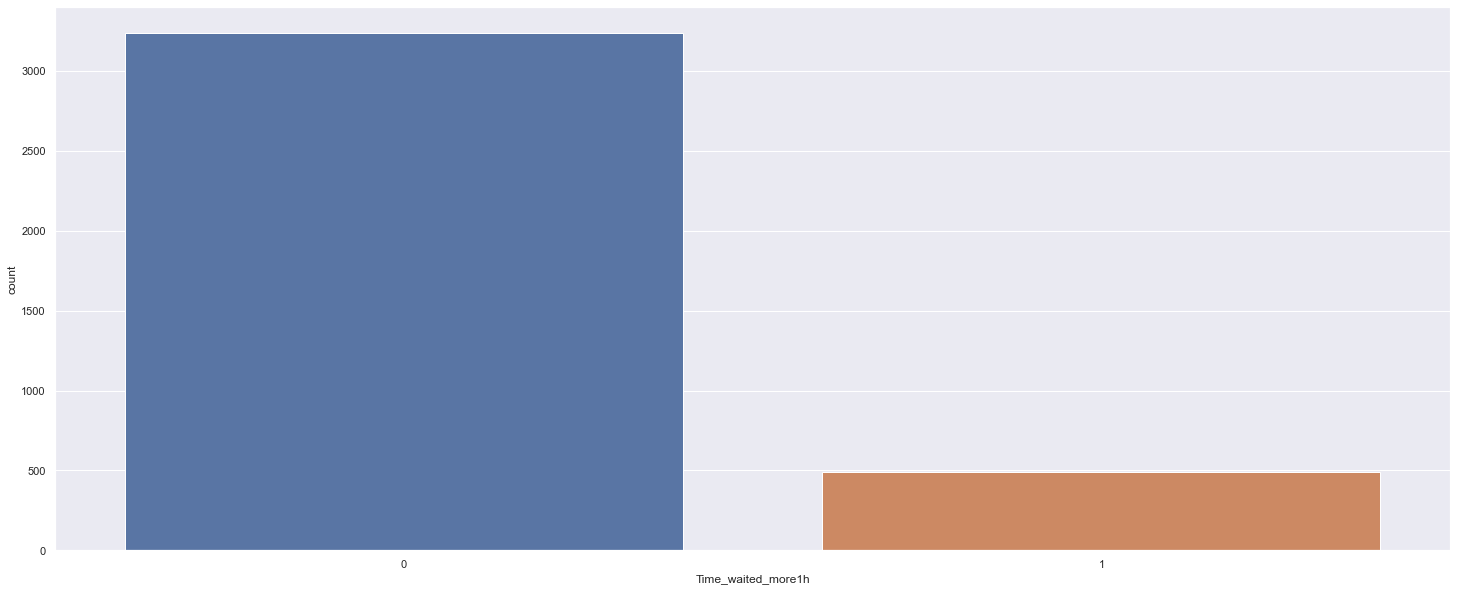

In [325]:
# Se the distribution in the first train:
ax = sns.countplot(x=Y_train )
Y_test.value_counts(normalize =True)

## Fit the test and Train to the model

In [326]:
# Logisstic Regression

log_reg = LogisticRegression(random_state = 10, solver = "lbfgs")    
log_reg.fit(X_train, Y_train)

LogisticRegression(random_state=10)

In [327]:
# Array of predictions:
y_predict = log_reg.predict(X_train)
y_predict


array([0, 0, 0, ..., 0, 0, 0])

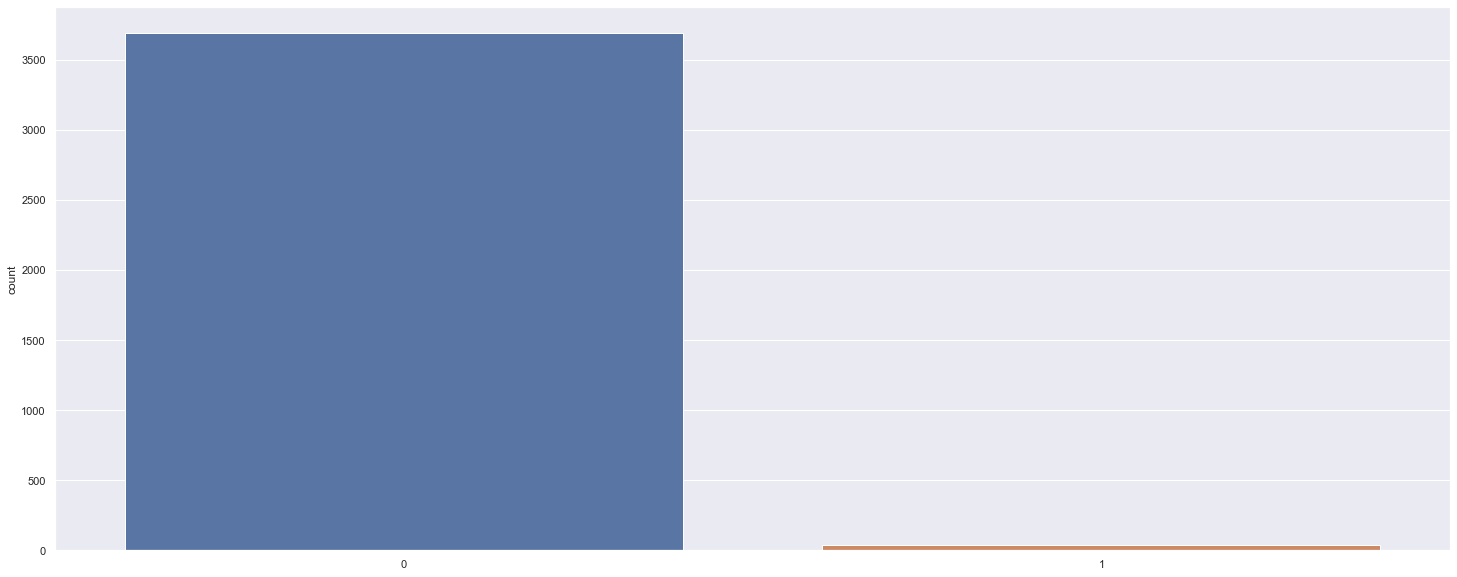

In [328]:
sns.countplot( x = y_predict, data = df )
unique, counts = np.unique(y_predict, return_counts=True)

In [329]:
pred_pr = log_reg.predict_proba(X_train)

## Results

In [330]:
#Accuracy Train:
Training_Accurecy = log_reg.score(X_train, Y_train)
print(" ")
print("The Training Accurecy is: ", log_reg.score(X_train, Y_train))
print(" ")
#Accuracy Train:
print("The Test Accurecy is: ", log_reg.score(X_test, Y_test))

 
The Training Accurecy is:  0.8677929739876643
 
The Test Accurecy is:  0.8542336548767417


In [331]:
CM = confusion_matrix(Y_train, y_predict) 
CM
# Corrects predicted less 1h  , Incorrects predicted less 1h
# Incorrects predicted more 1h, Corrects predicted more that 1h 

array([[3220,   20],
       [ 473,   16]], dtype=int64)

# Predict the last message:

In [332]:
# Get just the las row to fit it in the model:
last_msn = df_model[-1:].drop("Time_waited_more1h", axis = 1) .values
# Return "Yes" or "No"
reply_less_1h = log_reg.predict(last_msn)
# Return the prob
proba_each = log_reg.predict_proba(last_msn)

name_last_row = df_gr["Name"].iloc[-1]

more_1h_prob = proba_each[0][1]
odds_more_1h = "{:.2%}".format(more_1h_prob)

less_1h_prob = proba_each[0][0]
odds_less_1h = "{:.2%}".format(less_1h_prob)


if reply_less_1h == 0:
    print("The prediction is that", name_last_row, "won't have to wait more than one hour with a", odds_more_1h , "of an error")
    print("So the odds to get the answer in less than 1h is of:",odds_less_1h )
else:
    print("The prediction is that", name_last_row, "will have to wait more than one hour with a", odds_less_1h , "of an error")
    print("So the odds to get the answer in more than 1h is of:",odds_less_1h )

The prediction is that Berta won't have to wait more than one hour with a 10.00% of an error
So the odds to get the answer in less than 1h is of: 90.00%
